# Compute tx35 regional averages for the satellite plots

In [1]:
import regionmask
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import json
import glob

### Import the CliMAF library to do the pretreatments (https://climaf.readthedocs.io/en/master/)

In [2]:
from climaf.api import *

CliMAF version = 1.2.13


CliMAF install => /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V1.2.13_post
python => /modfs/modtools/miniconda2/envs/analyse_2.7_v2/bin/python
---
Required softwares to run CliMAF => you are using the following versions/installations:
ncl 6.6.2 => /modfs/modtools/miniconda2/envs/analyse_2.7_v2/bin/ncl
cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) 4.5.2 => /opt/nco-4.5.2/bin/ncks
ncdump fichier => /modfs/modtools/miniconda2/envs/analyse_2.7_v2/bin/ncdump
Check stamping requirements
nco (ncatted) found -> /opt/nco-4.5.2/bin/ncatted
convert found -> /usr/bin/convert
pdftk found -> /usr/bin/pdftk
exiv2 found -> /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V1.2.13_post/bin/exiv2
---


Cache directory set to : /data/jservon/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/jservon/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


# CMIP5

## Prepare the netcdf files received from Maialen Iturbide (ATLAS)
Split the files by member (model/realization)

In [8]:
# -- Function to split a multi-member file in individual files
# -- Uses Xarray
def split_ensemble_file(ensemble_file, output_pattern, variable):
    if not os.path.isdir(os.path.dirname(output_pattern)):
        os.makedirs(os.path.dirname(output_pattern))
    import xarray as xr
    dat = xr.open_dataset(ensemble_file)[variable]
    for member in dat.member:
        member_name = str(member.values)
        print member_name
        outfilename = output_pattern+member_name+'.nc'
        if not os.path.isfile(outfilename):
            print 'Save '+outfilename
            member_dat = dat.loc[:,member_name,:,:]
            member_dat.to_netcdf(outfilename)
        else:
            print outfilename+' already exists'


variable='tx35'

# -- Compute the annual sums
exp_list = [
    dict(experiment='historical',
         years = range(1971,2006)),
    dict(experiment='rcp85',
         years = range(2006,2101)),
    dict(experiment='rcp26',
         years = range(2006,2101)),
]

variable='tx35isimip'
for exp_dict in exp_list:
    years = exp_dict['years']
    experiment = exp_dict['experiment']
    for year in years:
        wfile = '/data/jservon/IPCC/tx35/bias_corrected/CMIP5_'+experiment+'_'+variable+'/CMIP5_'+experiment+'_'+variable+'_'+str(year)+'.nc4'
        output_pattern = '/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_'+experiment+'_'+variable+'_'+str(year)+'_'
        split_ensemble_file(wfile, output_pattern, variable)
#

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1971_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1971_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1971_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1971_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1971_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1971_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1971_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1973_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1973_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1973_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1973_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1973_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1973_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1973_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1975_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1975_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1975_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1975_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1975_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1975_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1975_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1977_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1977_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1977_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1977_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1977_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1977_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1977_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1979_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1979_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1979_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1979_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1979_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1979_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1979_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1981_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1981_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1981_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1981_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1981_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1981_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1981_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1983_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1983_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1983_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1983_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1983_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1983_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1983_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1985_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1985_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1985_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1985_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1985_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1985_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1985_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1987_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1987_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1987_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1987_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1987_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1987_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1987_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1989_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1989_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1989_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1989_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1989_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1989_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1989_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1991_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1991_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1991_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1991_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1991_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1991_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1991_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1993_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1993_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1993_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1993_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1993_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1993_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1993_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1995_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1995_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1995_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1995_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1995_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1995_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1995_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1997_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1997_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1997_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1997_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1997_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1997_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1997_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1999_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1999_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1999_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1999_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1999_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1999_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1999_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2001_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2001_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2001_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2001_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2001_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2001_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2001_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2003_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2003_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2003_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2003_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2003_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2003_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2003_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2005_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2005_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2005_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2005_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2005_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2005_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2005_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2008_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2008_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2008_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2008_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2008_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2008_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2008_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2011_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2011_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2011_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2011_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2011_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2011_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2011_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2014_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2014_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2014_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2014_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2014_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2014_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2014_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2017_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2017_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2017_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2017_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2017_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2017_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2017_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2020_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2020_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2020_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2020_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2020_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2020_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2020_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2023_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2023_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2023_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2023_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2023_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2023_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2023_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2026_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2026_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2026_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2026_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2026_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2026_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2026_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2029_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2029_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2029_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2029_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2029_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2029_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2029_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2032_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2032_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2032_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2032_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2032_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2032_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2032_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2035_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2035_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2035_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2035_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2035_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2035_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2035_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2038_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2038_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2038_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2038_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2038_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2038_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2038_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2050_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2050_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2050_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2050_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2050_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2050_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2050_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2053_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2053_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2053_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2053_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2053_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2053_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2053_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2056_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2056_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2056_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2056_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2056_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2056_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2056_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2059_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2059_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2059_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2059_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2059_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2059_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2059_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2062_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2062_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2062_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2062_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2062_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2062_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2062_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2065_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2065_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2065_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2065_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2065_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2065_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2065_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2068_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2068_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2068_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2068_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2068_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2068_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2068_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2071_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2071_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2071_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2071_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2071_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2071_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2071_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2074_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2074_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2074_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2074_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2074_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2074_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2074_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2077_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2077_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2077_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2077_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2077_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2077_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2077_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2080_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2080_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2080_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2080_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2080_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2080_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2080_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2092_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2092_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2092_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2092_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2092_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2092_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2092_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2095_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2095_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2095_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2095_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2095_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2095_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2095_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

ACCESS1-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2098_ACCESS1-0_r1i1p1.nc already exists
ACCESS1-3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2098_ACCESS1-3_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2098_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2098_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2098_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2098_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2098_CCSM4_r1i1p1.nc already exists
CESM1-BGC_r1i1p1
/data/jservon/IPCC/tx35/bias_cor

bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2006_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2006_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2006_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2006_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2006_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2006_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2006_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bi

bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2009_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2009_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2009_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2009_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2009_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2009_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2009_EC-EARTH_r12i1p1.nc already exists
GFDL-CM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corr

bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2012_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2012_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2012_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2012_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2012_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2012_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2012_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bi

bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2015_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2015_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2015_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2015_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2015_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2015_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2015_EC-EARTH_r12i1p1.nc already exists
GFDL-CM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corr

CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2018_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2018_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2018_EC-EARTH_r12i1p1.nc already exists
GFDL-CM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2018_GFDL-CM3_r1i1p1.nc already exists
GFDL-ESM2G_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2018_GFDL-ESM2G_r1i1p1.nc already exists
GFDL-ESM2M_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2018_GFDL-ESM2M_r1i1p1.nc already exists
HadGEM2-ES_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2018_HadGEM2-ES_r1i1p1.nc already exists
IPSL-CM5A-LR_r1i1p1
/data/jserv

MIROC-ESM-CHEM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2021_MIROC-ESM-CHEM_r1i1p1.nc already exists
MIROC-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2021_MIROC-ESM_r1i1p1.nc already exists
MIROC5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2021_MIROC5_r1i1p1.nc already exists
MPI-ESM-LR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2021_MPI-ESM-LR_r1i1p1.nc already exists
MPI-ESM-MR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2021_MPI-ESM-MR_r1i1p1.nc already exists
MRI-CGCM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2021_MRI-CGCM3_r1i1p1.nc already exists
NorESM1-M_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2021_NorESM1-M_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon

bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2025_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2025_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2025_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2025_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2025_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2025_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2025_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bi

bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2028_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2028_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2028_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2028_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2028_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2028_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2028_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bi

CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2031_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2031_EC-EARTH_r12i1p1.nc already exists
GFDL-CM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2031_GFDL-CM3_r1i1p1.nc already exists
GFDL-ESM2G_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2031_GFDL-ESM2G_r1i1p1.nc already exists
GFDL-ESM2M_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2031_GFDL-ESM2M_r1i1p1.nc already exists
HadGEM2-ES_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2031_HadGEM2-ES_r1i1p1.nc already exists
IPSL-CM5A-LR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2031_IPSL-CM5A-LR_r1i1p1.nc already exists
IPSL-CM5A-MR_r1i1p1
/da

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2034_HadGEM2-ES_r1i1p1.nc already exists
IPSL-CM5A-LR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2034_IPSL-CM5A-LR_r1i1p1.nc already exists
IPSL-CM5A-MR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2034_IPSL-CM5A-MR_r1i1p1.nc already exists
MIROC-ESM-CHEM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2034_MIROC-ESM-CHEM_r1i1p1.nc already exists
MIROC-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2034_MIROC-ESM_r1i1p1.nc already exists
MIROC5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2034_MIROC5_r1i1p1.nc already exists
MPI-ESM-LR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2034_MPI-ESM-LR_r1i1p1.nc already exists
MPI-ESM-MR_r1i1p1
/data/jservon/IPCC/tx

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2037_MIROC5_r1i1p1.nc already exists
MPI-ESM-LR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2037_MPI-ESM-LR_r1i1p1.nc already exists
MPI-ESM-MR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2037_MPI-ESM-MR_r1i1p1.nc already exists
MRI-CGCM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2037_MRI-CGCM3_r1i1p1.nc already exists
NorESM1-M_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2037_NorESM1-M_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2038_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2038_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corre

BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2041_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2041_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2041_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2041_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2041_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2041_EC-EARTH_r12i1p1.nc already exists
GFDL-CM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2041_GFDL-CM3_r1i1p1.nc already exists
GFDL-ESM2G_r1i1p1
/data/jservon/IPCC/tx35/bias_correc

CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2044_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2044_EC-EARTH_r12i1p1.nc already exists
GFDL-CM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2044_GFDL-CM3_r1i1p1.nc already exists
GFDL-ESM2G_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2044_GFDL-ESM2G_r1i1p1.nc already exists
GFDL-ESM2M_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2044_GFDL-ESM2M_r1i1p1.nc already exists
HadGEM2-ES_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2044_HadGEM2-ES_r1i1p1.nc already exists
IPSL-CM5A-LR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2044_IPSL-CM5A-LR_r1i1p1.nc already exists
IPSL-CM5A-MR_r1i1p1
/da

MIROC-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2047_MIROC-ESM_r1i1p1.nc already exists
MIROC5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2047_MIROC5_r1i1p1.nc already exists
MPI-ESM-LR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2047_MPI-ESM-LR_r1i1p1.nc already exists
MPI-ESM-MR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2047_MPI-ESM-MR_r1i1p1.nc already exists
MRI-CGCM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2047_MRI-CGCM3_r1i1p1.nc already exists
NorESM1-M_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2047_NorESM1-M_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2048_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/

bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2051_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2051_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2051_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2051_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2051_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2051_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2051_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bi

GFDL-ESM2G_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2054_GFDL-ESM2G_r1i1p1.nc already exists
GFDL-ESM2M_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2054_GFDL-ESM2M_r1i1p1.nc already exists
HadGEM2-ES_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2054_HadGEM2-ES_r1i1p1.nc already exists
IPSL-CM5A-LR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2054_IPSL-CM5A-LR_r1i1p1.nc already exists
IPSL-CM5A-MR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2054_IPSL-CM5A-MR_r1i1p1.nc already exists
MIROC-ESM-CHEM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2054_MIROC-ESM-CHEM_r1i1p1.nc already exists
MIROC-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2054_MIROC-ESM_r1i1p1.nc already exists
MIROC5_r1i1p1

IPSL-CM5A-MR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2057_IPSL-CM5A-MR_r1i1p1.nc already exists
MIROC-ESM-CHEM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2057_MIROC-ESM-CHEM_r1i1p1.nc already exists
MIROC-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2057_MIROC-ESM_r1i1p1.nc already exists
MIROC5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2057_MIROC5_r1i1p1.nc already exists
MPI-ESM-LR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2057_MPI-ESM-LR_r1i1p1.nc already exists
MPI-ESM-MR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2057_MPI-ESM-MR_r1i1p1.nc already exists
MRI-CGCM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2057_MRI-CGCM3_r1i1p1.nc already exists
NorESM1-M_r1i1p1
/data/jser

bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2061_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2061_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2061_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2061_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2061_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2061_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2061_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bi

CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2064_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2064_EC-EARTH_r12i1p1.nc already exists
GFDL-CM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2064_GFDL-CM3_r1i1p1.nc already exists
GFDL-ESM2G_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2064_GFDL-ESM2G_r1i1p1.nc already exists
GFDL-ESM2M_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2064_GFDL-ESM2M_r1i1p1.nc already exists
HadGEM2-ES_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2064_HadGEM2-ES_r1i1p1.nc already exists
IPSL-CM5A-LR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2064_IPSL-CM5A-LR_r1i1p1.nc already exists
IPSL-CM5A-MR_r1i1p1
/da

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2067_MIROC5_r1i1p1.nc already exists
MPI-ESM-LR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2067_MPI-ESM-LR_r1i1p1.nc already exists
MPI-ESM-MR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2067_MPI-ESM-MR_r1i1p1.nc already exists
MRI-CGCM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2067_MRI-CGCM3_r1i1p1.nc already exists
NorESM1-M_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2067_NorESM1-M_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2068_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2068_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corre

bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2071_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2071_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2071_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2071_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2071_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2071_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2071_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bi

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2074_IPSL-CM5A-LR_r1i1p1.nc already exists
IPSL-CM5A-MR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2074_IPSL-CM5A-MR_r1i1p1.nc already exists
MIROC-ESM-CHEM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2074_MIROC-ESM-CHEM_r1i1p1.nc already exists
MIROC-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2074_MIROC-ESM_r1i1p1.nc already exists
MIROC5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2074_MIROC5_r1i1p1.nc already exists
MPI-ESM-LR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2074_MPI-ESM-LR_r1i1p1.nc already exists
MPI-ESM-MR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2074_MPI-ESM-MR_r1i1p1.nc already exists
MRI-CGCM3_r1i1p1
/data/jservon/IPCC/tx35/

MIROC5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2077_MIROC5_r1i1p1.nc already exists
MPI-ESM-LR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2077_MPI-ESM-LR_r1i1p1.nc already exists
MPI-ESM-MR_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2077_MPI-ESM-MR_r1i1p1.nc already exists
MRI-CGCM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2077_MRI-CGCM3_r1i1p1.nc already exists
NorESM1-M_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2077_NorESM1-M_r1i1p1.nc already exists
bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2078_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2078_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/t

BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2081_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2081_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2081_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2081_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2081_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2081_EC-EARTH_r12i1p1.nc already exists
GFDL-CM3_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2081_GFDL-CM3_r1i1p1.nc already exists
GFDL-ESM2G_r1i1p1
/data/jservon/IPCC/tx35/bias_correc

bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2084_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2084_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2084_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2084_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2084_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2084_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2084_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bi

bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2087_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2087_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2087_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2087_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2087_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2087_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2087_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bi

bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2090_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2090_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2090_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2090_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2090_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2090_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2090_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bi

bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2093_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2093_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2093_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2093_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2093_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2093_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2093_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bi

bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2096_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2096_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2096_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2096_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2096_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2096_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2096_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bi

bcc-csm1-1-m_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2099_bcc-csm1-1-m_r1i1p1.nc already exists
bcc-csm1-1_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2099_bcc-csm1-1_r1i1p1.nc already exists
BNU-ESM_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2099_BNU-ESM_r1i1p1.nc already exists
CanESM2_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2099_CanESM2_r1i1p1.nc already exists
CCSM4_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2099_CCSM4_r1i1p1.nc already exists
CNRM-CM5_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2099_CNRM-CM5_r1i1p1.nc already exists
CSIRO-Mk3-6-0_r1i1p1
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2099_CSIRO-Mk3-6-0_r1i1p1.nc already exists
EC-EARTH_r12i1p1
/data/jservon/IPCC/tx35/bi

### Declare CliMAF project to get the data

In [3]:
pattern = '/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_${experiment}_${variable}_${period}_${member}.nc'
cproject('tx_individual_models_cmip5_ch12','experiment','period','member',('variable','tx35isimip'), ensemble=['member'], separator='%')
dataloc(project='tx_individual_models_cmip5_ch12', url=pattern)    

<climaf.dataloc.dataloc instance at 0x2baaa8750440>

### List the time slices we will need
Set a baseline + baseline_ext that we will concatenate after

In [4]:
exp_dict_list = dict(
    baseline = dict(experiment='historical',
         period='1995-2005'
        ),
    baseline_ext = dict(experiment='rcp85',
         period='2006-2015'
        ),
    rcp26_mid = dict(experiment='rcp26',
         period='2041-2060'
        ),
    rcp26_far = dict(experiment='rcp26',
         period='2081-2100'
        ),
    rcp85_mid = dict(experiment='rcp85',
         period='2041-2060'
        ),
    rcp85_far = dict(experiment='rcp85',
         period='2081-2100'
        )  
)

### Create the ensembles for each period/scenario

In [5]:
ens_exp_dict = dict()
lom_per_exp = dict()
for exp in exp_dict_list:
    print exp
    
    experiment = exp_dict_list[exp]['experiment']
    period = exp_dict_list[exp]['period']

    req = ds(experiment=experiment,
             period=period,
             member='*',
             project='tx_individual_models_cmip5_ch12')

    ens_exp = req.explore('ensemble')
    #
    # -- Climatologies
    clim_exp      = clim_average(ens_exp, 'ANM')
    
    lom_per_exp[exp] = clim_exp.keys()

    # -- Changes = Scenario minus baselines
    ens_exp_dict[exp] = clim_exp


baseline_ext
rcp85_far
rcp26_far
baseline
rcp26_mid
rcp85_mid


## !!! Tests

In [6]:
ens_exp_dict.keys()

['rcp85_mid',
 'baseline_ext',
 'rcp26_mid',
 'rcp85_far',
 'rcp26_far',
 'baseline']

## !!! Tests

In [12]:
lom_per_exp = dict()
req_dict = dict(project='tx_individual_models_cmip5_ch12')

ens_clim_exp_dict = dict()

for exp in exp_dict_list:
    print exp
    wreq = dict(project='tx_individual_models_cmip5_ch12')
    wreq.update(exp_dict_list[exp])

    req_exp = ds(member='*',
                 **wreq
                )
    models_exp = req_exp.explore('choices')['member']  

    lom_per_exp[exp] = models_exp
    
    ens_clim_exp_dict[exp] = req_exp.explore('ensemble')
    


baseline_ext
rcp85_far
rcp26_far
baseline
rcp26_mid
rcp85_mid


### Select the models that are common to baseline and baseline ext

In [13]:
lom_baseline     = lom_per_exp['baseline']
lom_baseline_ext = lom_per_exp['baseline_ext']
print 'Models not in both sets:'
print set(lom_baseline) ^ set(lom_baseline_ext)
print 'Models in common:'
common_lom_baseline = list( set(lom_baseline) & set(lom_baseline_ext) )
print common_lom_baseline

Models not in both sets:
set([])
Models in common:
['bcc-csm1-1_r1i1p1', 'MPI-ESM-MR_r1i1p1', 'CanESM2_r1i1p1', 'ACCESS1-3_r1i1p1', 'ACCESS1-0_r1i1p1', 'CESM1-BGC_r1i1p1', 'NorESM1-M_r1i1p1', 'CNRM-CM5_r1i1p1', 'MIROC-ESM-CHEM_r1i1p1', 'CMCC-CMS_r1i1p1', 'CSIRO-Mk3-6-0_r1i1p1', 'IPSL-CM5A-LR_r1i1p1', 'GFDL-CM3_r1i1p1', 'HadGEM2-ES_r1i1p1', 'inmcm4_r1i1p1', 'BNU-ESM_r1i1p1', 'CCSM4_r1i1p1', 'MRI-CGCM3_r1i1p1', 'MPI-ESM-LR_r1i1p1', 'GFDL-ESM2M_r1i1p1', 'IPSL-CM5A-MR_r1i1p1', 'IPSL-CM5B-LR_r1i1p1', 'CMCC-CM_r1i1p1', 'GFDL-ESM2G_r1i1p1', 'HadGEM2-CC_r1i1p1', 'MIROC-ESM_r1i1p1', 'MIROC5_r1i1p1', 'EC-EARTH_r12i1p1', 'bcc-csm1-1-m_r1i1p1']


### Check manually if the periods requested are actually covered

In [14]:
for exp in ['baseline','baseline_ext','rcp85_mid','rcp85_far']:
    
    print '--> '+exp
    wreq = req_dict.copy()
    wreq.update(exp_dict_list[exp])
    
    for member in lom_per_exp[exp]:
        print '==> Member:', member, exp
        # -- baseline hist
        req_exp = ds(member=member, **wreq)
        for tmpfile in req_exp.baseFiles().split(' '):
            print tmpfile
        print ''


--> baseline
==> Member: ACCESS1-0_r1i1p1 baseline
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1995_ACCESS1-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1996_ACCESS1-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1997_ACCESS1-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1998_ACCESS1-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1999_ACCESS1-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2000_ACCESS1-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2001_ACCESS1-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2002_ACCESS1-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_histor

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1995_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1996_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1997_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1998_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1999_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2000_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2001_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2002_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2003_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1995_HadGEM2-CC_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1996_HadGEM2-CC_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1997_HadGEM2-CC_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1998_HadGEM2-CC_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1999_HadGEM2-CC_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2000_HadGEM2-CC_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2001_HadGEM2-CC_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2002_HadGEM2-CC_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2003_HadGEM2-CC_r1i1p1.nc
/

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1995_MIROC5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1996_MIROC5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1997_MIROC5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1998_MIROC5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1999_MIROC5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2000_MIROC5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2001_MIROC5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2002_MIROC5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2003_MIROC5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_correcte

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1995_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1996_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1997_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1998_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_1999_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2000_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2001_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2002_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_historical_tx35isimip_2003_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_correcte

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2006_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2007_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2008_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2009_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2010_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2011_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2012_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2013_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2014_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_r

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2006_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2007_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2008_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2009_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2010_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2011_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2012_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2013_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2014_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individ

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2006_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2007_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2008_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2009_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2010_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2011_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2012_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2013_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2014_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_model

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2042_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2043_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2045_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2046_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2048_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2049_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2050_CCSM4_

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2042_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2043_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2045_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2046_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2048_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2049_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2042_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2043_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2045_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2046_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2048_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2049_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individ

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_IPSL-CM5A-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2042_IPSL-CM5A-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2043_IPSL-CM5A-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_IPSL-CM5A-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2045_IPSL-CM5A-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2046_IPSL-CM5A-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_IPSL-CM5A-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2048_IPSL-CM5A-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2049_IPSL-CM5A-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_MIROC-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2042_MIROC-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2043_MIROC-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_MIROC-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2045_MIROC-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2046_MIROC-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_MIROC-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2048_MIROC-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2049_MIROC-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_model

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2042_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2043_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2045_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2046_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2048_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2049_MRI-CGCM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_model

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2041_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2042_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2043_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2044_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2045_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2046_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2047_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2048_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2049_inmcm4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_20

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2081_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2082_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2084_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2085_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2087_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2088_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_CCSM4_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2090_CCSM4_

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2081_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2082_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2084_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2085_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2087_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2088_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_CNRM-CM5_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_r

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2081_GFDL-CM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2082_GFDL-CM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_GFDL-CM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2084_GFDL-CM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2085_GFDL-CM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_GFDL-CM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2087_GFDL-CM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2088_GFDL-CM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_GFDL-CM3_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_r

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2081_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2082_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2084_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2085_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2087_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2088_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_HadGEM2-ES_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individ

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2081_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2082_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2084_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2085_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2087_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2088_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_MIROC-ESM-CHEM_r1i1p1.nc
/data/jser

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2081_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2082_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2084_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2085_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2087_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2088_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individ

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2081_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2082_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2083_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2084_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2085_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2086_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2087_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2088_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp85_tx35isimip_2089_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individ

In [15]:
for exp in ['rcp26_mid','rcp26_far']:

    print '--> '+exp
    wreq = req_dict.copy()
    wreq.update(exp_dict_list[exp])
    
    for member in lom_per_exp[exp]:
        print '==> Member:', member, exp
        # -- baseline hist
        req_exp = ds(member=member, **wreq)
        for tmpfile in req_exp.baseFiles().split(' '):
            print tmpfile
        print ''


--> rcp26_mid
==> Member: BNU-ESM_r1i1p1 rcp26_mid
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2041_BNU-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2042_BNU-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2043_BNU-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2044_BNU-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2045_BNU-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2046_BNU-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2047_BNU-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2048_BNU-ESM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2049_BNU-ESM_r1i1p1.nc
/data/jservon/IPCC/tx3

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2041_CanESM2_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2042_CanESM2_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2043_CanESM2_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2044_CanESM2_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2045_CanESM2_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2046_CanESM2_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2047_CanESM2_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2048_CanESM2_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2049_CanESM2_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2041_GFDL-ESM2M_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2042_GFDL-ESM2M_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2043_GFDL-ESM2M_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2044_GFDL-ESM2M_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2045_GFDL-ESM2M_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2046_GFDL-ESM2M_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2047_GFDL-ESM2M_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2048_GFDL-ESM2M_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2049_GFDL-ESM2M_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individ

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2041_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2042_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2043_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2044_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2045_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2046_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2047_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2048_MIROC-ESM-CHEM_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2049_MIROC-ESM-CHEM_r1i1p1.nc
/data/jser

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2041_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2042_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2043_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2044_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2045_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2046_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2047_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2048_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2049_MPI-ESM-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individ

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2041_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2042_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2043_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2044_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2045_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2046_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2047_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2048_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2049_bcc-csm1-1_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individ

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2081_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2082_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2083_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2084_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2085_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2086_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2087_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2088_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2089_CSIRO-Mk3-6-0_r1i1p1.nc
/data/jservon/IPCC/

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2081_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2082_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2083_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2084_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2085_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2086_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2087_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2088_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2089_GFDL-ESM2G_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individ

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2081_IPSL-CM5A-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2082_IPSL-CM5A-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2083_IPSL-CM5A-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2084_IPSL-CM5A-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2085_IPSL-CM5A-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2086_IPSL-CM5A-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2087_IPSL-CM5A-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2088_IPSL-CM5A-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2089_IPSL-CM5A-MR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2081_MPI-ESM-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2082_MPI-ESM-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2083_MPI-ESM-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2084_MPI-ESM-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2085_MPI-ESM-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2086_MPI-ESM-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2087_MPI-ESM-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2088_MPI-ESM-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2089_MPI-ESM-LR_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individ

/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2081_bcc-csm1-1-m_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2082_bcc-csm1-1-m_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2083_bcc-csm1-1-m_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2084_bcc-csm1-1-m_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2085_bcc-csm1-1-m_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2086_bcc-csm1-1-m_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2087_bcc-csm1-1-m_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2088_bcc-csm1-1-m_r1i1p1.nc
/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP5_rcp26_tx35isimip_2089_bcc-csm1-1-m_r1i1p1.nc
/data/jservon/IPCC/tx35/bias

### Concatenate baseline and baseline_ext

In [16]:
wreq_dict = req_dict.copy()
wreq_dict.update(exp_dict_list['baseline'])
ens_baseline_hist = eds(member=common_lom_baseline,
                        **wreq_dict
                       )

wreq_dict = req_dict.copy()
wreq_dict.update(exp_dict_list['baseline_ext'])
ens_baseline_ext = eds(member=common_lom_baseline,
                       **wreq_dict
                      )
ens_baseline_dict = dict()
for mem in ens_baseline_hist:
    ens_baseline_dict[mem] = ccdo2(ens_baseline_hist[mem], ens_baseline_ext[mem], operator='cat')

# -- Add to the list of ensembles
ens_baseline = cens(ens_baseline_dict)
ens_exp_dict['baseline'] = clim_average(ens_baseline, 'ANM')

### Get the warming levels for the models

In [17]:
import csv

GWL_csv = '/home/jservon/Chapter12_IPCC/scripts/ATLAS/warming-levels/CMIP5_Atlas_WarmingLevels.csv'

GWL_dict = dict()
i = 0
with open(GWL_csv) as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')#, quotechar='|')
    for row in spamreader:
        print row
        model = row[0].split('_')[0]
        print model
        GWL_dict[model] = dict()
        if i==0:
            colnames = row
        j = 0
        for elt in row:
            print elt
            GWL_dict[model][colnames[j]] = row[j]
            j = j + 1
        i = i + 1

['model_run', '1.5_rcp26', '2_rcp26', '3_rcp26', '4_rcp26', '1.5_rcp45', '2_rcp45', '3_rcp45', '4_rcp45', '1.5_rcp85', '2_rcp85', '3_rcp85', '4_rcp85']
model
model_run
1.5_rcp26
2_rcp26
3_rcp26
4_rcp26
1.5_rcp45
2_rcp45
3_rcp45
4_rcp45
1.5_rcp85
2_rcp85
3_rcp85
4_rcp85
['ACCESS1-0_r1i1p1', '9999', '9999', '9999', '9999', '2033', '2053', 'NA', 'NA', '2028', '2041', '2061', '2081']
ACCESS1-0
ACCESS1-0_r1i1p1
9999
9999
9999
9999
2033
2053
NA
NA
2028
2041
2061
2081
['ACCESS1-3_r1i1p1', '9999', '9999', '9999', '9999', '2039', '2056', 'NA', 'NA', '2031', '2042', '2062', '2082']
ACCESS1-3
ACCESS1-3_r1i1p1
9999
9999
9999
9999
2039
2056
NA
NA
2031
2042
2062
2082
['bcc-csm1-1-m_r1i1p1', '2009', '2043', 'NA', 'NA', '2010', '2035', 'NA', 'NA', '2007', '2028', '2059', '2085']
bcc-csm1-1-m
bcc-csm1-1-m_r1i1p1
2009
2043
NA
NA
2010
2035
NA
NA
2007
2028
2059
2085
['bcc-csm1-1_r1i1p1', '2022', 'NA', 'NA', 'NA', '2021', '2042', 'NA', 'NA', '2019', '2036', '2059', '2083']
bcc-csm1-1
bcc-csm1-1_r1i1p1
2022

In [18]:
GWL_dict

{'ACCESS1-0': {'1.5_rcp26': '9999',
  '1.5_rcp45': '2033',
  '1.5_rcp85': '2028',
  '2_rcp26': '9999',
  '2_rcp45': '2053',
  '2_rcp85': '2041',
  '3_rcp26': '9999',
  '3_rcp45': 'NA',
  '3_rcp85': '2061',
  '4_rcp26': '9999',
  '4_rcp45': 'NA',
  '4_rcp85': '2081',
  'model_run': 'ACCESS1-0_r1i1p1'},
 'ACCESS1-3': {'1.5_rcp26': '9999',
  '1.5_rcp45': '2039',
  '1.5_rcp85': '2031',
  '2_rcp26': '9999',
  '2_rcp45': '2056',
  '2_rcp85': '2042',
  '3_rcp26': '9999',
  '3_rcp45': 'NA',
  '3_rcp85': '2062',
  '4_rcp26': '9999',
  '4_rcp45': 'NA',
  '4_rcp85': '2082',
  'model_run': 'ACCESS1-3_r1i1p1'},
 'BNU-ESM': {'1.5_rcp26': 'NA',
  '1.5_rcp45': 'NA',
  '1.5_rcp85': 'NA',
  '2_rcp26': 'NA',
  '2_rcp45': 'NA',
  '2_rcp85': 'NA',
  '3_rcp26': 'NA',
  '3_rcp45': 'NA',
  '3_rcp85': 'NA',
  '4_rcp26': 'NA',
  '4_rcp45': 'NA',
  '4_rcp85': 'NA',
  'model_run': 'BNU-ESM_r1i1p1'},
 'CCSM4': {'1.5_rcp26': '2016',
  '1.5_rcp45': '2017',
  '1.5_rcp85': '2014',
  '2_rcp26': 'NA',
  '2_rcp45': '2039

### Get the periods for each GWL for both scenarios and create ensembles per GWL

In [19]:
ens_dict_per_GWL = dict()
list_of_GWLs = ['1.5','2','3','4']

for GWL in list_of_GWLs:
    ens_dict_per_GWL[GWL] = dict()

req_dict = dict(project='tx_individual_models_cmip5_ch12')

for scenario in ['26','85']:
    list_of_models = ens_exp_dict['rcp'+scenario+'_far'].keys()
    for wmodel_realization in list_of_models:
        wmodel = wmodel_realization.split('_')[0]
        if wmodel in GWL_dict:
            print 'We have : ', wmodel
            print GWL_dict[wmodel]
            for GWL in list_of_GWLs:
                if scenario=='26': GWL_scenario = GWL+'_rcp26'
                if scenario=='85': GWL_scenario = GWL+'_rcp85'

                # --> file nc
                # --> period
                central_year = GWL_dict[wmodel][GWL_scenario]
                if central_year not in ['NA','9999'] and float(central_year)>=2024:
                    start_year = str( int(central_year)-9 )
                    end_year = str( int(central_year)+10 )
                    
                    dat = ds(member = wmodel_realization,
                             experiment = 'rcp'+scenario,
                             period=start_year+'-'+end_year,
                             **req_dict
                             )
                    ens_dict_per_GWL[GWL][wmodel+'_'+scenario] = clim_average(dat, 'ANM')
                    print cfile(ens_dict_per_GWL[GWL][wmodel+'_'+scenario])
        else:
            print 'We dont have GWL info for ',wmodel

We have :  MPI-ESM-MR
{'4_rcp45': 'NA', '1.5_rcp26': '2023', '2_rcp85': '2038', '2_rcp45': '2045', '1.5_rcp85': '2019', '3_rcp85': '2060', '4_rcp85': '2082', '3_rcp45': 'NA', '4_rcp26': 'NA', '1.5_rcp45': '2023', '3_rcp26': 'NA', 'model_run': 'MPI-ESM-MR_r1i1p1', '2_rcp26': 'NA'}
We have :  BNU-ESM
{'4_rcp45': 'NA', '1.5_rcp26': 'NA', '2_rcp85': 'NA', '2_rcp45': 'NA', '1.5_rcp85': 'NA', '3_rcp85': 'NA', '4_rcp85': 'NA', '3_rcp45': 'NA', '4_rcp26': 'NA', '1.5_rcp45': 'NA', '3_rcp26': 'NA', 'model_run': 'BNU-ESM_r1i1p1', '2_rcp26': 'NA'}
We have :  CCSM4
{'4_rcp45': 'NA', '1.5_rcp26': '2016', '2_rcp85': '2030', '2_rcp45': '2039', '1.5_rcp85': '2014', '3_rcp85': '2057', '4_rcp85': '2077', '3_rcp45': 'NA', '4_rcp26': 'NA', '1.5_rcp45': '2017', '3_rcp26': 'NA', 'model_run': 'CCSM4_r1i1p1', '2_rcp26': 'NA'}
We have :  MRI-CGCM3
{'4_rcp45': 'NA', '1.5_rcp26': 'NA', '2_rcp85': '2052', '2_rcp45': '2084', '1.5_rcp85': '2041', '3_rcp85': '2076', '4_rcp85': 'NA', '3_rcp45': 'NA', '4_rcp26': 'NA', 

/data/jservon/climafcache/08/bd4b9a1026ee36a5f62054e48caf592726c31adf87f6a9564ba170.nc
/data/jservon/climafcache/d1/88479e948203ce6d8e787e4139f325527e064e632e5255d4ed6252.nc
We have :  CanESM2
{'4_rcp45': 'NA', '1.5_rcp26': '2013', '2_rcp85': '2026', '2_rcp45': '2031', '1.5_rcp85': '2012', '3_rcp85': '2049', '4_rcp85': '2068', '3_rcp45': '2075', '4_rcp26': 'NA', '1.5_rcp45': '2017', '3_rcp26': 'NA', 'model_run': 'CanESM2_r1i1p1', '2_rcp26': '2032'}
/data/jservon/climafcache/60/a8854a57dc1ae4b1f1176fb18c2ecd4d724d48248eba8a5f18e625.nc
/data/jservon/climafcache/dd/7af228e1407db5ff58b36acd24ecc93c8b6131ee2beeaf6e6d2e4f.nc
/data/jservon/climafcache/bc/e382345a53a068da0ed933a98416fb84515547d2d2063f3d0c4d77.nc
We have :  MPI-ESM-LR
{'4_rcp45': 'NA', '1.5_rcp26': '2022', '2_rcp85': '2036', '2_rcp45': '2042', '1.5_rcp85': '2017', '3_rcp85': '2061', '4_rcp85': '2081', '3_rcp45': 'NA', '4_rcp26': 'NA', '1.5_rcp45': '2022', '3_rcp26': 'NA', 'model_run': 'MPI-ESM-LR_r1i1p1', '2_rcp26': 'NA'}
/data

/data/jservon/climafcache/7b/a78de0c497655a367377db490fb2c80b941388485e80667e254cb2.nc
We have :  bcc-csm1-1
{'4_rcp45': 'NA', '1.5_rcp26': '2022', '2_rcp85': '2036', '2_rcp45': '2042', '1.5_rcp85': '2019', '3_rcp85': '2059', '4_rcp85': '2083', '3_rcp45': 'NA', '4_rcp26': 'NA', '1.5_rcp45': '2021', '3_rcp26': 'NA', 'model_run': 'bcc-csm1-1_r1i1p1', '2_rcp26': 'NA'}
/data/jservon/climafcache/94/58788874f092ebc73e595947884a49b5a71335ab2781a5abe946fc.nc
/data/jservon/climafcache/b8/7bc8bb4379b4b62a9db544e4e0ca6e3f967a1253019bbc9f97fc00.nc
/data/jservon/climafcache/ed/6dbe9ebefbe328b54971085615f6f1b26d5b6bc2ab329498f9197c.nc
We have :  CMCC-CM
{'4_rcp45': 'NA', '1.5_rcp26': '9999', '2_rcp85': '2041', '2_rcp45': '2050', '1.5_rcp85': '2029', '3_rcp85': '2060', '4_rcp85': '2078', '3_rcp45': 'NA', '4_rcp26': '9999', '1.5_rcp45': '2033', '3_rcp26': '9999', 'model_run': 'CMCC-CM_r1i1p1', '2_rcp26': '9999'}
/data/jservon/climafcache/d8/0f02787f08bc5e8a3eb7b93d12c0393fcab8eb89aceb8ec5f7168d.nc
/da

### Functions to compute the regional averages

In [20]:
def weighted_mean(da, weights, dim):
    """Reduce da by a weighted mean along some dimension(s).

    Parameters
    ----------
    da : DataArray
        Object over which the weighted reduction operation is applied.    
    weights : DataArray
        An array of weights associated with the values in this Dataset.
    dim : str or sequence of str, optional
        Dimension(s) over which to apply the weighted `mean`.
        
    Returns
    -------
    weighted_mean : DataArray
        New DataArray with weighted mean applied to its data and
        the indicated dimension(s) removed.
    """

    weighted_sum = (da * weights).sum(dim=dim, skipna=True)
    # need to mask weights where data is not valid
    masked_weights = weights.where(da.notnull())
    sum_of_weights = masked_weights.sum(dim=dim, skipna=True)
    valid_weights = sum_of_weights != 0
    sum_of_weights = sum_of_weights.where(valid_weights)

    return weighted_sum / sum_of_weights

def average_over_AR6_region(filename, variable, region_name):

    # -- AR6 regions
    #ar6_all = regionmask.defined_regions.ar6.all
    # -- Get the regions
    ar6_land = regionmask.defined_regions.ar6.land

    #ax = ar6_all.plot()
    # -- Get land/sea mask (generic)
    land_110 = regionmask.defined_regions.natural_earth.land_110

    # -- Get data
    ds = xr.open_dataset(filename, decode_times=False)
    dat = ds[variable]
    dat.values = np.array(dat.values, dtype=np.float32)

    # -- Mask the data
    mask_3D = ar6_land.mask_3D(dat) # AR6 mask
    land_mask = land_110.mask_3D(dat) # Land sea mask
    mask_lsm = mask_3D * land_mask.squeeze(drop=True) # Combine the two

    weights = np.cos(np.deg2rad(dat.lat))
    
    if region_name=='all':
        return weighted_mean(dat, mask_3D * weights, ("lon", "lat"))
    else:
        if isinstance(region_name, list):
            res = list()
            for region in region_name:
                region_mask = mask_lsm.isel(region=list(mask_3D.abbrevs).index(region))
                dat_region = dat.where(region_mask)
                weights_region = weights.where(region_mask)
                res.append( weighted_mean(dat_region, region_mask*weights_region, ("lon","lat")) )
            return res
        else:
            region_mask = mask_lsm.isel(region=list(mask_3D.abbrevs).index(region_name))
            dat_region = dat.where(region_mask)
            weights_region = weights.where(region_mask)            
            return weighted_mean(dat_region, region_mask*weights_region, ("lon","lat"))
    
def regions_contained(lon, lat, regions):

    # determine if the longitude needs to be wrapped
    regions_is_180 = regions.lon_180
    grid_is_180 = regionmask.core.utils._is_180(lon.min(), lon.max())

    wrap_lon = not regions_is_180 == grid_is_180

    lon_orig = lon.copy()
    if wrap_lon:
        lon = regionmask.core.utils._wrapAngle(lon, wrap_lon)

    lon = np.asarray(lon).squeeze()
    lat = np.asarray(lat).squeeze()

    if lon.ndim == 1 and lat.ndim == 1:
        poly = shapely.geometry.box(lon.min(), lat.min(), lon.max(), lat.max())

    # convex_hull is not really what we need
    # https://gist.github.com/dwyerk/10561690
    #     elif lon.ndim == 2 and lat.ndim == 2:
    #         # get the convex hull from all points
    #         lonlat = np.stack([lon.ravel(), lat.ravel()], axis=1)
    #         multipoint = shapely.geometry.MultiPoint(lonlat)
    #         poly = multipoint.convex_hull
    else:
        raise ValueError("Cannot currently handle 2D coordinates")

    fully_contained = list()
    for region_poly in regions.polygons:
        res = poly.contains(region_poly)

        fully_contained.append(res)

    return xr.DataArray(
        fully_contained, dims=["region"], coords=dict(region=regions.numbers)
    )

if None:
    region_name = "all"
    variable = 'tx35'
    filename = "/data/jservon/IPCC/tx35/individual_models/CMIP6_ssp585_tx35_2100_NorESM2-LM_r1i1p1f1.nc"

    tmp = average_over_AR6_region(filename, variable, region_name)
    tmp

### Start with baseline, mid-term, late-term, ssp126 and ssp585

In [21]:
regional_averages = dict()

# -- Loop on experiments / horizons
for ens_exp in ens_exp_dict:
    print ens_exp
    regional_averages[ens_exp] = dict()
    # -- Loop on the members of each ensemble
    for mem in ens_exp_dict[ens_exp]:
        print mem
        # -- Compute the averages for each AR6 region thanks to regionmask
        tmp = average_over_AR6_region(cfile(ens_exp_dict[ens_exp][mem]), 'tx35isimip', 'all')
        region_names = tmp.abbrevs
        for tmp_region_name in region_names:
            region_name = str(tmp_region_name.values)
            print region_name
            region_value = float(tmp.sel(region=list(tmp.abbrevs).index(region_name)).values)
            if region_name not in regional_averages[ens_exp]:
                regional_averages[ens_exp][region_name] = [region_value]
            else:
                regional_averages[ens_exp][region_name].append(region_value)

rcp85_mid
IPSL-CM5B-LR_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
MPI-ESM-MR_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
inmcm4_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
CanESM2_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
MPI-ESM-LR_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
S

GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
NorESM1-M_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
CNRM-CM5_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
IPSL-CM5A-LR_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
GFDL-ESM2M_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EA

GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
inmcm4_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
CanESM2_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
MPI-ESM-LR_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
BNU-ESM_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
CCS

CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
CSIRO-Mk3-6-0_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
IPSL-CM5A-LR_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
GFDL-CM3_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
MIROC-ESM_r1i1p1
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
MIROC5_

In [22]:
regional_averages_diff = dict()

# -- Loop on experiments / horizons
#wind_ens_clim_exp_dict[exp]
for ens_exp in ens_exp_dict:
    if ens_exp not in ['baseline','baseline_ext']:
        print ens_exp
        regional_averages_diff[ens_exp] = dict()
        # -- Loop on the members of each ensemble
        for mem in ens_exp_dict[ens_exp]:
            if mem in ens_exp_dict['baseline']:
                print mem
                # -- Compute the averages for each AR6 region thanks to regionmask
                #print cfile(ens_exp_dict[ens_exp][mem])
                #cmd = 'ncrename -v .uas,wind -v .vas,wind -v .sfcWind,wind '+cfile(ens_exp_dict[ens_exp][mem])
                #os.system(cmd)
                tmp = average_over_AR6_region(cfile(ens_exp_dict[ens_exp][mem]), 'tx35isimip', 'all')
                tmp_baseline = average_over_AR6_region(cfile(ens_exp_dict['baseline'][mem]), 'tx35isimip', 'all')
                region_names = tmp.abbrevs
                for tmp_region_name in region_names:
                    region_name = str(tmp_region_name.values)
                    region_value = float(tmp.sel(region=list(tmp.abbrevs).index(region_name)).values)
                    region_value_baseline = float(tmp_baseline.sel(region=list(tmp.abbrevs).index(region_name)).values)
                    if region_name not in regional_averages_diff[ens_exp]:
                        regional_averages_diff[ens_exp][region_name] = [region_value - region_value_baseline]
                    else:
                        regional_averages_diff[ens_exp][region_name].append(region_value - region_value_baseline)
        #

rcp85_mid
IPSL-CM5B-LR_r1i1p1
MPI-ESM-MR_r1i1p1
inmcm4_r1i1p1
CanESM2_r1i1p1
MPI-ESM-LR_r1i1p1
BNU-ESM_r1i1p1
CCSM4_r1i1p1
ACCESS1-3_r1i1p1
ACCESS1-0_r1i1p1
GFDL-ESM2G_r1i1p1
MRI-CGCM3_r1i1p1
CESM1-BGC_r1i1p1
NorESM1-M_r1i1p1
CNRM-CM5_r1i1p1
IPSL-CM5A-LR_r1i1p1
GFDL-ESM2M_r1i1p1
IPSL-CM5A-MR_r1i1p1
HadGEM2-CC_r1i1p1
bcc-csm1-1_r1i1p1
CMCC-CM_r1i1p1
CMCC-CMS_r1i1p1
CSIRO-Mk3-6-0_r1i1p1
MIROC-ESM-CHEM_r1i1p1
GFDL-CM3_r1i1p1
MIROC-ESM_r1i1p1
MIROC5_r1i1p1
EC-EARTH_r12i1p1
bcc-csm1-1-m_r1i1p1
HadGEM2-ES_r1i1p1
rcp26_mid
MPI-ESM-MR_r1i1p1
BNU-ESM_r1i1p1
CCSM4_r1i1p1
MRI-CGCM3_r1i1p1
MPI-ESM-LR_r1i1p1
NorESM1-M_r1i1p1
CNRM-CM5_r1i1p1
MIROC-ESM-CHEM_r1i1p1
GFDL-ESM2M_r1i1p1
IPSL-CM5A-MR_r1i1p1
bcc-csm1-1_r1i1p1
CanESM2_r1i1p1
GFDL-ESM2G_r1i1p1
CSIRO-Mk3-6-0_r1i1p1
IPSL-CM5A-LR_r1i1p1
GFDL-CM3_r1i1p1
MIROC-ESM_r1i1p1
MIROC5_r1i1p1
EC-EARTH_r12i1p1
HadGEM2-ES_r1i1p1
bcc-csm1-1-m_r1i1p1
rcp85_far
IPSL-CM5B-LR_r1i1p1
MPI-ESM-MR_r1i1p1
inmcm4_r1i1p1
CanESM2_r1i1p1
MPI-ESM-LR_r1i1p1
BNU-ESM_r1i1p1


In [ ]:
for GWL in ens_dict_per_GWL :
    print GWL
    regional_averages[GWL] = dict()
    # -- Loop on the members of each ensemble
    for mem in ens_dict_per_GWL[GWL]:
        print mem
        # -- Compute the averages for each AR6 region thanks to regionmask
        tmp = average_over_AR6_region(cfile(ens_dict_per_GWL[GWL][mem]), 'tx35isimip', 'all')
        region_names = tmp.abbrevs
        for tmp_region_name in region_names:
            region_name = str(tmp_region_name.values)
            print region_name
            region_value = float(tmp.sel(region=list(tmp.abbrevs).index(region_name)).values)
            if region_name not in regional_averages[GWL]:
                regional_averages[GWL][region_name] = [region_value]
            else:
                regional_averages[GWL][region_name].append(region_value)

1.5
ACCESS1-0_85
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
CNRM-CM5_85
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
inmcm4_85
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
MRI-CGCM3_85
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN
GFDL-ESM2M_85
GIC
NWN
NEN
WNA
CNA
ENA
NCA
SCA
CAR
NWS
NSA
NES
SAM
SWS
SES
SSA
NEU
WCE
EEU
MED
SAH
WAF
CAF
NEAF
SEAF
WSAF
ESAF
MDG
RAR
WSB
ESB
RFE
WCA
ECA
TIB
EAS
ARP
SAS
SEA
NAU
CAU
EAU
SAU
NZ
EAN
WAN

In [ ]:
#regional_averages = dict()
# -- Loop on experiments / horizons
for GWL in ens_dict_per_GWL:
    print GWL
    regional_averages_diff[GWL] = dict()
    # -- Loop on the members of each ensemble
    for mem in ens_dict_per_GWL[GWL]:
        wmem = mem.replace('_85','').replace('_26','')
        #if mem.replace('_85','').replace('_26','') in ens_exp_dict['historical_1995-2014']:
        if wmem in ens_exp_dict['baseline']:
            print wmem
            # -- Compute the averages for each AR6 region thanks to regionmask
            tmp = average_over_AR6_region(cfile(ens_dict_per_GWL[GWL][mem]), 'tx35isimip', 'all')
            tmp_baseline = average_over_AR6_region(cfile(ens_exp_dict['baseline'][wmem]), 'tx35isimip', 'all')
            region_names = tmp.abbrevs
            for tmp_region_name in region_names:
                region_name = str(tmp_region_name.values)
                #print region_name
                region_value = float(tmp.sel(region=list(tmp.abbrevs).index(region_name)).values)
                region_value_baseline = float(tmp_baseline.sel(region=list(tmp_baseline.abbrevs).index(region_name)).values)
                if region_name not in regional_averages_diff[GWL]:
                    regional_averages_diff[GWL][region_name] = [region_value - region_value_baseline]
                else:
                    regional_averages_diff[GWL][region_name].append(region_value - region_value_baseline)

### Compute the ensemble statistics

In [ ]:
quantiles_dict = dict()
for clim_period in regional_averages:
    quantiles_dict[clim_period] = dict()
    for region_name in regional_averages[clim_period]:
        print clim_period, region_name
        quantiles_dict[clim_period][region_name] = dict()
        dat = np.array(regional_averages[clim_period][region_name])
        q10 = np.quantile(dat, 0.1)
        q50 = np.quantile(dat, 0.5)
        q90 = np.quantile(dat, 0.9)
        quantiles_dict[clim_period][region_name] = [q10, q50, q90]

import json

ensemble = 'CMIP5'
outfilename = '/home/jservon/Chapter12_IPCC/data/tx35_satellites/'+ensemble+'_tx35isimip_AR6_regional_averages.json'
#print outfilename
with open(outfilename, 'w') as fp:
    json.dump(quantiles_dict, fp, sort_keys=True, indent=4)

In [ ]:
quantiles_dict = dict()
for clim_period in regional_averages_diff:
    quantiles_dict[clim_period] = dict()
    for region_name in regional_averages_diff[clim_period]:
        print clim_period, region_name
        quantiles_dict[clim_period][region_name] = dict()
        dat = np.array(regional_averages_diff[clim_period][region_name])
        q10 = np.quantile(dat, 0.1)
        q50 = np.quantile(dat, 0.5)
        q90 = np.quantile(dat, 0.9)
        quantiles_dict[clim_period][region_name] = [q10, q50, q90]

import json

ensemble = 'CMIP5'
outfilename = '/home/jservon/Chapter12_IPCC/data/tx35_satellites/'+ensemble+'_tx35isimip_diff_AR6_regional_averages.json'
#print outfilename
with open(outfilename, 'w') as fp:
    json.dump(quantiles_dict, fp, sort_keys=True, indent=4)

#  
#  
#  

# CMIP6

In [7]:
pattern = '/data/jservon/IPCC/tx35/bias_corrected/individual_models/CMIP6_${experiment}_${variable}_${period}_${member}.nc'
cproject('tx_individual_models_cmip6_ch12','experiment','period','member',('variable','tx35isimip'), ensemble=['member'], separator='%')
dataloc(project='tx_individual_models_cmip6_ch12', url=pattern)    

<climaf.dataloc.dataloc instance at 0x2baaa8c70ea8>

In [8]:
exp_dict_list = dict(
    baseline = dict(experiment='historical',
         period='1995-2014'
        ),
    ssp126_mid = dict(experiment='ssp126',
         period='2041-2060'
        ),
    ssp126_far = dict(experiment='ssp126',
         period='2081-2100'
        ),
    ssp585_mid = dict(experiment='ssp585',
         period='2041-2060'
        ),
    ssp585_far = dict(experiment='ssp585',
         period='2081-2100'
        )  
)


In [17]:
ens_exp_dict = dict()
for exp in exp_dict_list:
    
    experiment = exp_dict_list[exp]['experiment']
    period = exp_dict_list[exp]['period']

    req = ds(experiment=experiment,
             period=period,
             member='*',
             project='tx_individual_models_cmip6_ch12')

    ens_exp = req.explore('ensemble')
    #
    # -- Climatologies
    clim_exp      = clim_average(ccdo(ens_exp, operator='yearsum'), 'ANM')

    # -- Changes = Scenario minus baselines
    ens_exp_dict[exp] = clim_exp


## !!! Tests

In [10]:
ens_exp_dict.keys()

['ssp585_far', 'ssp126_far', 'baseline', 'ssp126_mid', 'ssp585_mid']

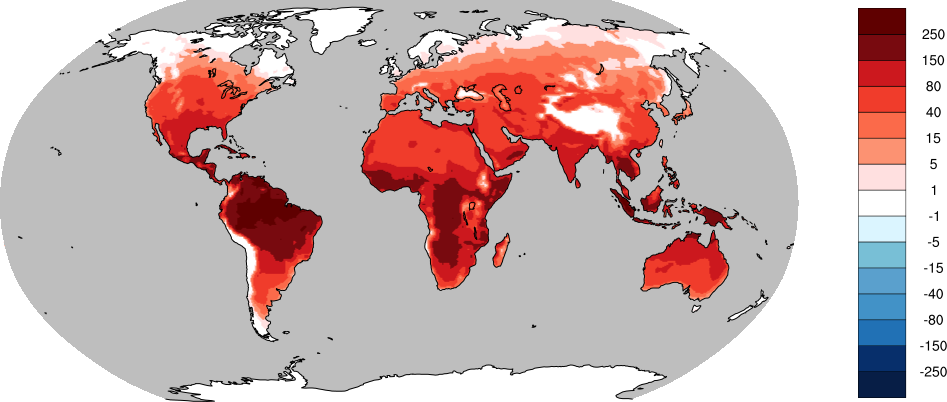

In [18]:
wfar, wbaseline = ensemble_intersection([ens_exp_dict['ssp585_far'], ens_exp_dict['baseline']])
wfar.pop('EC-Earth3-Veg_r1i1p1f1')
wbaseline.pop('EC-Earth3-Veg_r1i1p1f1')
ens_diff = regridn(fsub(wfar,wbaseline), cdogrid='r360x180')
pp_colorbar = dict(proj   = 'Robinson',
                   colors = '-250 -150 -80 -40 -15 -5 -1 1 5 15 40 80 150 250',
                   #colors = '-100 -50 -20 -15 -10 -6 -3 -1 1 3 6 10 15 20 50 100',
                   color  = 'temp_diff_18lev',#NCV_blu_red',
                   mpCenterLonF = 0,
                   focus = 'land',
                   tiMainFontHeightF=0.03,
                   gsnStringFontHeightF=0.02,
                   gsnRightString='', gsnLeftString=''
                  )
implot(ccdo_ens(ens_diff, operator='enspctl,50'), **pp_colorbar)

## !!! Tests

In [ ]:
lom_per_exp = dict()
req_dict = dict(project='tx_individual_models_cmip6_ch12')

ens_clim_exp_dict = dict()

for exp in exp_dict_list:
    print exp
    wreq = dict(project='tx_individual_models_cmip6_ch12')
    wreq.update(exp_dict_list[exp])

    req_exp = ds(member='*',
                 **wreq
                )
    models_exp = req_exp.explore('choices')['member']  

    lom_per_exp[exp] = models_exp
    
    ens_clim_exp_dict[exp] = req_exp.explore('ensemble')
    


In [ ]:
import csv
GWL_csv = '/home/jservon/Chapter12_IPCC/scripts/ATLAS/warming-levels/CMIP6_Atlas_WarmingLevels.csv'

GWL_dict = dict()
i = 0
with open(GWL_csv) as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')#, quotechar='|')
    for row in spamreader:
        print row
        model = row[0]#.split('_')[0]
        print model
        GWL_dict[model] = dict()
        if i==0:
            colnames = row
        j = 1
        for elt in row[1:len(row)]:
            print elt
            GWL_dict[model][colnames[j]] = row[j]
            j = j + 1
        i = i + 1

In [ ]:
ens_dict_per_GWL = dict()
list_of_GWLs = ['1.5','2','3','4']
for GWL in list_of_GWLs:
    ens_dict_per_GWL[GWL] = dict()


for scenario in ['26','85']:
    
    if scenario=='26': req_scenario = 'ssp126'
    if scenario=='85': req_scenario = 'ssp585'
    list_of_models = ens_exp_dict[req_scenario+'_far'].keys()
    for wmodel_realization in list_of_models:
        wmodel = wmodel_realization.split('_')[0]
        if wmodel in GWL_dict:
            print 'We have : ', wmodel
            print GWL_dict[wmodel]
            for GWL in list_of_GWLs:
                if scenario=='26': GWL_scenario = GWL+'_ssp126'
                if scenario=='85': GWL_scenario = GWL+'_ssp585'

                # --> file nc
                # --> period
                central_year = GWL_dict[wmodel][GWL_scenario]
                if central_year not in ['NA','9999'] and float(central_year)>=2024:
                    start_year = str( int(central_year)-9 )
                    end_year = str( int(central_year)+10 )
                    
                    dat = ds(member = wmodel_realization,
                             experiment = req_scenario,
                             period=start_year+'-'+end_year,
                             **wreq
                             )
                    ens_dict_per_GWL[GWL][wmodel+'_'+scenario] = clim_average(dat, 'ANM')
                    print cfile(ens_dict_per_GWL[GWL][wmodel+'_'+scenario])
        else:
            print 'We dont have GWL info for ',wmodel

In [ ]:
def weighted_mean(da, weights, dim):
    """Reduce da by a weighted mean along some dimension(s).

    Parameters
    ----------
    da : DataArray
        Object over which the weighted reduction operation is applied.    
    weights : DataArray
        An array of weights associated with the values in this Dataset.
    dim : str or sequence of str, optional
        Dimension(s) over which to apply the weighted `mean`.
        
    Returns
    -------
    weighted_mean : DataArray
        New DataArray with weighted mean applied to its data and
        the indicated dimension(s) removed.
    """

    weighted_sum = (da * weights).sum(dim=dim, skipna=True)
    # need to mask weights where data is not valid
    masked_weights = weights.where(da.notnull())
    sum_of_weights = masked_weights.sum(dim=dim, skipna=True)
    valid_weights = sum_of_weights != 0
    sum_of_weights = sum_of_weights.where(valid_weights)

    return weighted_sum / sum_of_weights

def average_over_AR6_region(filename, variable, region_name):

    # -- AR6 regions
    #ar6_all = regionmask.defined_regions.ar6.all
    # -- Get the regions
    ar6_land = regionmask.defined_regions.ar6.land

    #ax = ar6_all.plot()
    # -- Get land/sea mask (generic)
    land_110 = regionmask.defined_regions.natural_earth.land_110

    # -- Get data
    ds = xr.open_dataset(filename, decode_times=False)
    dat = ds[variable]
    dat.values = np.array(dat.values, dtype=np.float32)

    # -- Mask the data
    mask_3D = ar6_land.mask_3D(dat) # AR6 mask
    land_mask = land_110.mask_3D(dat) # Land sea mask
    mask_lsm = mask_3D * land_mask.squeeze(drop=True) # Combine the two

    weights = np.cos(np.deg2rad(dat.lat))
    
    if region_name=='all':
        return weighted_mean(dat, mask_3D * weights, ("lon", "lat"))
    else:
        if isinstance(region_name, list):
            res = list()
            for region in region_name:
                region_mask = mask_lsm.isel(region=list(mask_3D.abbrevs).index(region))
                dat_region = dat.where(region_mask)
                weights_region = weights.where(region_mask)
                res.append( weighted_mean(dat_region, region_mask*weights_region, ("lon","lat")) )
            return res
        else:
            region_mask = mask_lsm.isel(region=list(mask_3D.abbrevs).index(region_name))
            dat_region = dat.where(region_mask)
            weights_region = weights.where(region_mask)            
            return weighted_mean(dat_region, region_mask*weights_region, ("lon","lat"))
    
def regions_contained(lon, lat, regions):

    # determine if the longitude needs to be wrapped
    regions_is_180 = regions.lon_180
    grid_is_180 = regionmask.core.utils._is_180(lon.min(), lon.max())

    wrap_lon = not regions_is_180 == grid_is_180

    lon_orig = lon.copy()
    if wrap_lon:
        lon = regionmask.core.utils._wrapAngle(lon, wrap_lon)

    lon = np.asarray(lon).squeeze()
    lat = np.asarray(lat).squeeze()

    if lon.ndim == 1 and lat.ndim == 1:
        poly = shapely.geometry.box(lon.min(), lat.min(), lon.max(), lat.max())

    # convex_hull is not really what we need
    # https://gist.github.com/dwyerk/10561690
    #     elif lon.ndim == 2 and lat.ndim == 2:
    #         # get the convex hull from all points
    #         lonlat = np.stack([lon.ravel(), lat.ravel()], axis=1)
    #         multipoint = shapely.geometry.MultiPoint(lonlat)
    #         poly = multipoint.convex_hull
    else:
        raise ValueError("Cannot currently handle 2D coordinates")

    fully_contained = list()
    for region_poly in regions.polygons:
        res = poly.contains(region_poly)

        fully_contained.append(res)

    return xr.DataArray(
        fully_contained, dims=["region"], coords=dict(region=regions.numbers)
    )

if None:
    region_name = "all"
    variable = 'tx35'
    filename = "/data/jservon/IPCC/tx35/individual_models/CMIP6_ssp585_tx35_2100_NorESM2-LM_r1i1p1f1.nc"

    tmp = average_over_AR6_region(filename, variable, region_name)
    tmp

In [ ]:
regional_averages = dict()

# -- Loop on experiments / horizons
for ens_exp in ens_exp_dict:
    print ens_exp
    regional_averages[ens_exp] = dict()
    # -- Loop on the members of each ensemble
    for mem in ens_exp_dict[ens_exp]:
        print mem
        # -- Compute the averages for each AR6 region thanks to regionmask
        tmp = average_over_AR6_region(cfile(ens_exp_dict[ens_exp][mem]), 'tx35isimip', 'all')
        region_names = tmp.abbrevs
        for tmp_region_name in region_names:
            region_name = str(tmp_region_name.values)
            print region_name
            region_value = float(tmp.sel(region=list(tmp.abbrevs).index(region_name)).values)
            if region_name not in regional_averages[ens_exp]:
                regional_averages[ens_exp][region_name] = [region_value]
            else:
                regional_averages[ens_exp][region_name].append(region_value)

In [ ]:
regional_averages_diff = dict()

# -- Loop on experiments / horizons
#wind_ens_clim_exp_dict[exp]
for ens_exp in ens_exp_dict:
    if ens_exp not in ['baseline','baseline_ext']:
        print ens_exp
        regional_averages_diff[ens_exp] = dict()
        # -- Loop on the members of each ensemble
        for mem in ens_exp_dict[ens_exp]:
            if mem in ens_exp_dict['baseline']:
                print mem
                # -- Compute the averages for each AR6 region thanks to regionmask
                #print cfile(ens_exp_dict[ens_exp][mem])
                #cmd = 'ncrename -v .uas,wind -v .vas,wind -v .sfcWind,wind '+cfile(ens_exp_dict[ens_exp][mem])
                #os.system(cmd)
                tmp = average_over_AR6_region(cfile(ens_exp_dict[ens_exp][mem]), 'tx35isimip', 'all')
                tmp_baseline = average_over_AR6_region(cfile(ens_exp_dict['baseline'][mem]), 'tx35isimip', 'all')
                region_names = tmp.abbrevs
                for tmp_region_name in region_names:
                    region_name = str(tmp_region_name.values)
                    region_value = float(tmp.sel(region=list(tmp.abbrevs).index(region_name)).values)
                    region_value_baseline = float(tmp_baseline.sel(region=list(tmp.abbrevs).index(region_name)).values)
                    if region_name not in regional_averages_diff[ens_exp]:
                        regional_averages_diff[ens_exp][region_name] = [region_value - region_value_baseline]
                    else:
                        regional_averages_diff[ens_exp][region_name].append(region_value - region_value_baseline)
        #

In [ ]:
for GWL in ens_GWL_dict :
    print GWL
    regional_averages[GWL] = dict()
    # -- Loop on the members of each ensemble
    for mem in ens_GWL_dict[GWL]:
        print mem
        # -- Compute the averages for each AR6 region thanks to regionmask
        tmp = average_over_AR6_region(cfile(ens_GWL_dict[GWL][mem]), 'tx35isimip', 'all')
        region_names = tmp.abbrevs
        for tmp_region_name in region_names:
            region_name = str(tmp_region_name.values)
            print region_name
            region_value = float(tmp.sel(region=list(tmp.abbrevs).index(region_name)).values)
            if region_name not in regional_averages[GWL]:
                regional_averages[GWL][region_name] = [region_value]
            else:
                regional_averages[GWL][region_name].append(region_value)

In [ ]:
#regional_averages = dict()
# -- Loop on experiments / horizons
for GWL in ens_dict_per_GWL:
    print GWL
    regional_averages_diff[GWL] = dict()
    # -- Loop on the members of each ensemble
    for mem in ens_dict_per_GWL[GWL]:
        wmem = mem.replace('_85','').replace('_26','')
        #if mem.replace('_85','').replace('_26','') in ens_exp_dict['historical_1995-2014']:
        if wmem in ens_exp_dict['baseline']:
            print wmem
            # -- Compute the averages for each AR6 region thanks to regionmask
            tmp = average_over_AR6_region(cfile(ens_dict_per_GWL[GWL][mem]), 'tx35isimip', 'all')
            tmp_baseline = average_over_AR6_region(cfile(ens_exp_dict['baseline'][wmem]), 'tx35isimip', 'all')
            region_names = tmp.abbrevs
            for tmp_region_name in region_names:
                region_name = str(tmp_region_name.values)
                #print region_name
                region_value = float(tmp.sel(region=list(tmp.abbrevs).index(region_name)).values)
                region_value_baseline = float(tmp_baseline.sel(region=list(tmp_baseline.abbrevs).index(region_name)).values)
                if region_name not in regional_averages_diff[GWL]:
                    regional_averages_diff[GWL][region_name] = [region_value - region_value_baseline]
                else:
                    regional_averages_diff[GWL][region_name].append(region_value - region_value_baseline)

In [ ]:
quantiles_dict = dict()
for clim_period in regional_averages:
    quantiles_dict[clim_period] = dict()
    for region_name in regional_averages[clim_period]:
        print clim_period, region_name
        quantiles_dict[clim_period][region_name] = dict()
        dat = np.array(regional_averages[clim_period][region_name])
        q10 = np.quantile(dat, 0.1)
        q50 = np.quantile(dat, 0.5)
        q90 = np.quantile(dat, 0.9)
        quantiles_dict[clim_period][region_name] = [q10, q50, q90]

import json

ensemble = 'CMIP6'
outfilename = '/home/jservon/Chapter12_IPCC/data/tx35_satellites/'+ensemble+'_tx35isimip_AR6_regional_averages.json'
#print outfilename
with open(outfilename, 'w') as fp:
    json.dump(quantiles_dict, fp, sort_keys=True, indent=4)

In [ ]:
quantiles_dict = dict()
for clim_period in regional_averages_diff:
    quantiles_dict[clim_period] = dict()
    for region_name in regional_averages_diff[clim_period]:
        print clim_period, region_name
        quantiles_dict[clim_period][region_name] = dict()
        dat = np.array(regional_averages_diff[clim_period][region_name])
        q10 = np.quantile(dat, 0.1)
        q50 = np.quantile(dat, 0.5)
        q90 = np.quantile(dat, 0.9)
        quantiles_dict[clim_period][region_name] = [q10, q50, q90]

import json

ensemble = 'CMIP6'
outfilename = '/home/jservon/Chapter12_IPCC/data/tx35_satellites/'+ensemble+'_tx35isimip_diff_AR6_regional_averages.json'
#print outfilename
with open(outfilename, 'w') as fp:
    json.dump(quantiles_dict, fp, sort_keys=True, indent=4)

#  
#  
#  

## CORDEX, all domains

In [ ]:
CORDEX_domains = [
    # -- Africa
    #'AFR-22','AFR-44',
    # -- AustralAsia
    #'AUS-22','AUS-44',
    # -- Central America
    #'CAM-22','CAM-44',
    # -- North America
    #'NAM-22','NAM-44',
    # -- South America
    #'SAM-22',
    'CAM',
    'EAS',
    'SAM',
    'SEA',
    'WAS'
    # -- Asia
    #'EAS-22','EAS-44',
    #'WAS-22','WAS-44',
    #'SEA-22',
    # -- Europe
    #'EUR-11',
    
]



variable='DF6'
CMIP = 'CORDEX'

# -- Compute the annual sums
exp_list = [
    #dict(experiment='rcp85',
    #     clim_period = 'hist'),
    #dict(experiment='rcp85',
    #     clim_period = 'farfut'),
    #dict(experiment='rcp85',
    #     clim_period='midfut'),
    #dict(experiment='rcp26',
    #     clim_period = 'farfut'),
    #dict(experiment='rcp26',
    #     clim_period = 'hist'),
    #dict(experiment='rcp85',
    #     clim_period = 'farch'),
    #dict(experiment='rcp85',
    #     clim_period='midch'),
    #dict(experiment='rcp26',
    #     clim_period = 'farch'),
    
    dict(experiment='rcp26',
         clim_period = 'GWL1.5'),
    dict(experiment='rcp26',
         clim_period = 'GWL2.0'),
    dict(experiment='rcp85',
         clim_period = 'GWL1.5'),
    dict(experiment='rcp85',
         clim_period = 'GWL2.0'),
    dict(experiment='rcp85',
         clim_period = 'GWL3.0'),
    dict(experiment='rcp85',
         clim_period = 'GWL4.0'),
]

for CORDEX_domain in CORDEX_domains:
    for exp_dict in exp_list:
        clim_period = exp_dict['clim_period']
        experiment = exp_dict['experiment']
        wfile = '/data/jservon/IPCC/DF/DF-CORDEX/'+CORDEX_domain+'/'+CORDEX_domain+'-22_'+experiment+'-DF6-'+clim_period+'.nc'
        outdir = '/data/jservon/IPCC/DF/individual_models/CORDEX/'+CORDEX_domain
        if not os.path.isdir(outdir):
            os.makedirs(outdir)
        output_pattern = '/data/jservon/IPCC/DF/individual_models/CORDEX/'+CORDEX_domain+'/'+CORDEX_domain+'-22_'+experiment+'_DF6_'+clim_period+'_'
        split_ensemble_file(wfile, output_pattern)
    

In [24]:
clog('critical')
#thres = 'Exceed'+wthres
# -- Scenarios - timelines
# ---------------------------------------------------------------------------
CORDEX_domains = [
    # -- Africa
    'AFR-22','AFR-44',
    # -- AustralAsia
    'AUS-22','AUS-44',
    # -- Central America
    'CAM-22','CAM-44',
    # -- North America
    'NAM-22','NAM-44',
    # -- South America
    'SAM-22','SAM-44',
    # -- Asia
    'EAS-22','EAS-44',
    'WAS-22','WAS-44',
    'SEA-22',
    # -- Europe
    'EUR-11',
    
]

CORDEX_domains = [
    # -- Africa
    #'AFR-22','AFR-44',
    # -- AustralAsia
    #'AUS-22','AUS-44',
    # -- Central America
    #'CAM-22','CAM-44',
    # -- North America
    #'NAM-22','NAM-44',
    # -- South America
    #'SAM-22',
    'CAM-22',
    'EAS-22',
    'SAM-22',
    'SEA-22',
    'WAS-22',
    'EUR-11'
    # -- Asia
    #'EAS-22','EAS-44',
    #'WAS-22','WAS-44',
    #'SEA-22',
    # -- Europe
    #'EUR-11',
    
]



exp_list = [
    # -- Baseline (ssp126 and ssp585 are the same files)
    dict(experiment='rcp85',
         clim_period = 'hist'),    
    # -- Mid term
    dict(experiment='rcp85',
         clim_period = 'midfut'),
    dict(experiment='rcp26',
         clim_period = 'midfut'),
    # -- Late term
    dict(experiment='rcp85',
         clim_period = 'farfut'),
    dict(experiment='rcp26',
         clim_period = 'farfut'),
]

ens_exp_dict_CORDEX = dict()
ens_GWL_dict_CORDEX = dict()

#for CORDEX_domain in ['AFR-22']:
for CORDEX_domain in CORDEX_domains:
    #
    # -- We use the first three letters of the CORDEX_domain to identify the region
    short_CORDEX_domain = CORDEX_domain[0:3]

    # -- Loop on the scenarios
    ens_exp_dict_CORDEX[short_CORDEX_domain] = dict()
    for exp in exp_list:
        #
        # -- Experiment and period
        experiment = exp['experiment']
        clim_period = exp['clim_period']

        # -- Create ensemble object for the scenario
        req_exp = ds(project='DF_cordex_ch12_test',
                     experiment = experiment,
                     #realization='r1i1p1',
                     clim_period = clim_period,
                     CORDEX_domain = CORDEX_domain,
                     member = '*'
                    )
        try:
            ens_exp = add_prefix_suffix_to_ens_req(req_exp.explore('ensemble'), suffix='_'+CORDEX_domain)
            #
            # -- Climatologies
            # If there is already a short_CORDEX_domain in the results, we merge the results of the new one
            if experiment+'_'+period in ens_exp_dict_CORDEX[short_CORDEX_domain]:
                #res_copy = ens_exp_dict_CORDEX[short_CORDEX_domain][experiment+'_'+period].copy()
                #final_ens = merge_climaf_ensembles([res_copy, clim_average(ens_exp, 'ANM')])
                ens_exp_dict_CORDEX[short_CORDEX_domain][experiment+'_'+period].update( clim_average(ens_exp, 'ANM') )
            else:
                ens_exp_dict_CORDEX[short_CORDEX_domain][experiment+'_'+period] = clim_average(ens_exp, 'ANM')
                #final_ens = clim_average(ens_exp, 'ANM')
            #ens_exp_dict_CORDEX[short_CORDEX_domain][experiment+'_'+period] = final_ens
        except:
            print 'no data found for ', req_exp
    #


    # -- Global Warming Levels
    # ---------------------------------------------------------------------------
    ens_GWL_dict_CORDEX[short_CORDEX_domain] = dict()

    # -- Loop on the GWLs
    for GWL in ['GWL1.5','GWL2.0','GWL3.0','GWL4.0']:
        #
        if GWL in ['GWL1.5']:
            # -- Create ensemble object for the scenario
            req_rcp26 = ds(project='DF_cordex_GWL_ch12',
                         experiment = 'rcp26',
                         GWL = GWL,
                         CORDEX_domain = CORDEX_domain,
                         member = '*'
                        )
            try:
                ens_rcp26 = req_rcp26.explore('ensemble')
            except:
                print 'No data found for ',req_rcp26
                ens_rcp26 = cens(dict())

            # -- Create ensemble object for the scenario
            req_rcp85 = ds(project='DF_cordex_GWL_ch12',
                         experiment = 'rcp85',
                         GWL = GWL,
                         CORDEX_domain = CORDEX_domain,
                         member = '*'
                        )
            try:
                ens_rcp85 = req_rcp85.explore('ensemble')
            except:
                print 'No data found for ',req_rcp85
                ens_rcp85 = cens(dict())
            #
            # -- Merge ensembles
            GWL_ens = merge_climaf_ensembles([add_prefix_suffix_to_ens_req(ens_rcp26,suffix='_rcp26'),
                                              add_prefix_suffix_to_ens_req(ens_rcp85,suffix='_rcp85')])
        else:
            # -- Create ensemble object for the scenario
            req_rcp85 = ds(project='wbgt_cordex_ch12_test',
                         experiment = 'rcp85',
                         #  realization='r1i1p1',
                         GWL = GWL,
                         CORDEX_domain = CORDEX_domain,
                         member = '*'
                        )
            GWL_ens = req_rcp85.explore('ensemble')
        #
        # -- Rename the members with the CORDEX domain for future merge
        renamed_GWL_ens = add_prefix_suffix_to_ens_req(GWL_ens, suffix='_'+CORDEX_domain)
        #
        # -- if GWL in ens_GWL_dict_CORDEX[short_CORDEX_domain]:
        if GWL in ens_GWL_dict_CORDEX[short_CORDEX_domain]:
            res_copy = ens_GWL_dict_CORDEX[short_CORDEX_domain][GWL].copy()
            final_ens = merge_climaf_ensembles([res_copy, clim_average(renamed_GWL_ens, 'ANM')])
            # We merge the new one with the old one
        else:
            # We just add the new one
            final_ens = clim_average(renamed_GWL_ens, 'ANM')
        #
        # -- Climatologies
        ens_GWL_dict_CORDEX[short_CORDEX_domain][GWL] = final_ens
    #

no data found for  ds('wbgt_cordex_ch12_test%%WBGTindoor%fx%global%rcp26%2041-2060%AUS-44%*%Exceed31')
no data found for  ds('wbgt_cordex_ch12_test%%WBGTindoor%fx%global%rcp26%2081-2100%AUS-44%*%Exceed31')
No data found for  ds('wbgt_cordex_ch12_test%%WBGTindoor%fx%global%rcp26%1.5K%AUS-44%*%Exceed31')
no data found for  ds('wbgt_cordex_ch12_test%%WBGTindoor%fx%global%rcp26%2041-2060%NAM-44%*%Exceed31')
no data found for  ds('wbgt_cordex_ch12_test%%WBGTindoor%fx%global%rcp26%2081-2100%NAM-44%*%Exceed31')
No data found for  ds('wbgt_cordex_ch12_test%%WBGTindoor%fx%global%rcp26%1.5K%NAM-44%*%Exceed31')
no data found for  ds('wbgt_cordex_ch12_test%%WBGTindoor%fx%global%rcp26%2041-2060%EAS-44%*%Exceed31')
no data found for  ds('wbgt_cordex_ch12_test%%WBGTindoor%fx%global%rcp26%2081-2100%EAS-44%*%Exceed31')
No data found for  ds('wbgt_cordex_ch12_test%%WBGTindoor%fx%global%rcp26%1.5K%EAS-44%*%Exceed31')


In [25]:
#
# -- Loop on the short CORDEX domains
# -- short_CORDEX_domains = ['AFR','EAS',...]
regional_averages_CORDEX = dict()

# -- Merge the dictionary with scenarios and the one with the GWLs
#ens_CORDEX = ens_exp_dict_CORDEX.copy()
#ens_CORDEX.update(ens_GWL_dict_CORDEX)

AR6regions_by_CORDEX_domain = dict(
    AUS = ['NAU','CAU','EAU','SAU','NZ'],
    SEA = ['SEA'],
    WAS = ['ARP','SAS','WCA'],#,'TIB'],
    EAS = ['TIB','ECA','EAS'],#'SAS'
    CAM = ['NSA','SCA','CAR'],
    SAM = ['NWS','NSA','SAM','NES','SWS','SES','SSA'],
    NAM = ['NWN','NEN','WNA','CNA','ENA','NCA'],#,'GAP'],
    EUR = ['MED','WCE','NEU'],
    AFR = ['WAF','SAH','CAF','WSAF','ESAF','MDG','SEAF','NEAF','ARP']
)

for ens_CORDEX in [ens_exp_dict_CORDEX, ens_GWL_dict_CORDEX]:
    for short_CORDEX_domain in ens_CORDEX:
        print short_CORDEX_domain
        if short_CORDEX_domain not in regional_averages_CORDEX:
            regional_averages_CORDEX[short_CORDEX_domain] = dict()

        # -- Loop on experiments / horizons
        for ens_exp in ens_CORDEX[short_CORDEX_domain]:
            if ens_exp not in ['3.0K']:
                print ens_exp
                regional_averages_CORDEX[short_CORDEX_domain][ens_exp] = dict()
                # -- Loop on the members of each ensemble
                for mem in ens_CORDEX[short_CORDEX_domain][ens_exp]:
                    #if 'CCCma-CanESM2--UCAN-WRF341I' not in mem:
                    print mem
                    # -- Compute the averages for each AR6 region thanks to regionmask
                    # --> We regrid on a 0.25° grid with conservative regridding
                    tmp = average_over_AR6_region(
                                cfile(regridn(ens_CORDEX[short_CORDEX_domain][ens_exp][mem], cdogrid='r1440x720', option='remapbil')),
                                'spell', 'all')
                    region_names = tmp.abbrevs
                    #for tmp_region_name in region_names:
                    for tmp_region_name in AR6regions_by_CORDEX_domain[short_CORDEX_domain]:
                        #region_name = str(tmp_region_name.values)
                        region_name = tmp_region_name
                        print region_name
                        region_value = float(tmp.sel(region=list(tmp.abbrevs).index(region_name))[0].values)
                        if region_name not in regional_averages_CORDEX[short_CORDEX_domain][ens_exp]:
                            regional_averages_CORDEX[short_CORDEX_domain][ens_exp][region_name] = [region_value]
                        else:
                            regional_averages_CORDEX[short_CORDEX_domain][ens_exp][region_name].append(region_value)




SEA
rcp85_1995-2014
MOHC-HadGEM2-ES--GERICS-REMO2015_r1i1p1_SEA-22
SEA
NOAA-GFDL-GFDL-ESM2M--ICTP-RegCM4-3_r1i1p1_SEA-22
SEA
NCC-NorESM1-M--GERICS-REMO2015_r1i1p1_SEA-22
SEA
MPI-M-MPI-ESM-LR--GERICS-REMO2015_r1i1p1_SEA-22
SEA
MOHC-HadGEM2-ES--SMHI-RCA4_r1i1p1_SEA-22
SEA
MOHC-HadGEM2-ES--ICTP-RegCM4-7_r1i1p1_SEA-22
SEA
NCC-NorESM1-M--ICTP-RegCM4-7_r1i1p1_SEA-22
SEA
IPSL-IPSL-CM5A-LR--ICTP-RegCM4-3_r1i1p1_SEA-22
SEA
ICHEC-EC-EARTH--ICTP-RegCM4-3_r1i1p1_SEA-22
SEA
MPI-M-MPI-ESM-MR--ICTP-RegCM4-7_r1i1p1_SEA-22
SEA
rcp26_2041-2060
MOHC-HadGEM2-ES--GERICS-REMO2015_r1i1p1_SEA-22
SEA
NCC-NorESM1-M--GERICS-REMO2015_r1i1p1_SEA-22
SEA
MPI-M-MPI-ESM-LR--GERICS-REMO2015_r1i1p1_SEA-22
SEA
MPI-M-MPI-ESM-MR--ICTP-RegCM4-7_r1i1p1_SEA-22
SEA
MOHC-HadGEM2-ES--ICTP-RegCM4-7_r1i1p1_SEA-22
SEA
NCC-NorESM1-M--ICTP-RegCM4-7_r1i1p1_SEA-22
SEA
rcp85_2041-2060
MOHC-HadGEM2-ES--GERICS-REMO2015_r1i1p1_SEA-22
SEA
NOAA-GFDL-GFDL-ESM2M--ICTP-RegCM4-3_r1i1p1_SEA-22
SEA
NCC-NorESM1-M--GERICS-REMO2015_r1i1p1_SEA-22
SEA


ICHEC-EC-EARTH--SMHI-RCA4_r12i1p1_CAM-44
NSA
SCA
CAR
MOHC-HadGEM2-ES--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
CNRM-CERFACS-CNRM-CM5--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
NCC-NorESM1-M--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
NOAA-GFDL-GFDL-ESM2M--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
CSIRO-QCCCE-CSIRO-Mk3-6-0--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
CCCma-CanESM2--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
IPSL-IPSL-CM5A-MR--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
MIROC-MIROC5--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
rcp26_2041-2060
MPI-M-MPI-ESM-LR--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
ICHEC-EC-EARTH--SMHI-RCA4_r12i1p1_CAM-44
NSA
SCA
CAR
MOHC-HadGEM2-ES--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
NCC-NorESM1-M--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
MIROC-MIROC5--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
rcp85_2041-2060
MPI-M-MPI-ESM-LR--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
ICHEC-EC-EARTH--SMHI-RCA4_r12i1p1_CAM-44
NSA
SCA
CAR
MOHC-HadGEM2-ES--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA
CAR
CNRM-CERFACS-CNRM-CM5--SMHI-RCA4_r1i1p1_CAM-44
NSA
SCA

WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
IPSL-IPSL-CM5A-MR--SMHI-RCA4_r1i1p1_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
NCC-NorESM1-M--SMHI-RCA4_r1i1p1_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
ICHEC-EC-EARTH--DMI-HIRHAM5_r3i1p1_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
rcp26_2041-2060
ICHEC-EC-EARTH--SMHI-RCA4_r12i1p1_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
NOAA-GFDL-GFDL-ESM2G--GERICS-REMO2009_r1i1p1_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
MOHC-HadGEM2-ES--GERICS-REMO2009_r1i1p1_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
MIROC-MIROC5--GERICS-REMO2009_r1i1p1_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
MPI-M-MPI-ESM-LR--MPI-CSC-REMO2009_r1i1p1_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
IPSL-IPSL-CM5A-LR--GERICS-REMO2009_r1i1p1_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
ICHEC-EC-EARTH--KNMI-RACMO22T_r12i1p1_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
MOHC-HadGEM2-ES--SMHI-RCA4_r1i1p1_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
ICHEC-EC-EAR

MED
WCE
NEU
MOHC-HadGEM2-ES--ICTP-RegCM4-6_r1i1p1_EUR-11
MED
WCE
NEU
ICHEC-EC-EARTH--CLMcom-ETH-COSMO-crCLIM-v1-1_r12i1p1_EUR-11
MED
WCE
NEU
MIROC-MIROC5--CLMcom-CCLM4-8-17_r1i1p1_EUR-11
MED
WCE
NEU
MOHC-HadGEM2-ES--IPSL-WRF381P_r1i1p1_EUR-11
MED
WCE
NEU
MPI-M-MPI-ESM-LR--CLMcom-CCLM4-8-17_r1i1p1_EUR-11
MED
WCE
NEU
MOHC-HadGEM2-ES--GERICS-REMO2015_r1i1p1_EUR-11
MED
WCE
NEU
CNRM-CERFACS-CNRM-CM5--IPSL-WRF381P_r1i1p1_EUR-11
MED
WCE
NEU
MOHC-HadGEM2-ES--CNRM-ALADIN63_r1i1p1_EUR-11
MED
WCE
NEU
IPSL-IPSL-CM5A-MR--KNMI-RACMO22E_r1i1p1_EUR-11
MED
WCE
NEU
NCC-NorESM1-M--KNMI-RACMO22E_r1i1p1_EUR-11
MED
WCE
NEU
CNRM-CERFACS-CNRM-CM5--GERICS-REMO2015_r1i1p1_EUR-11
MED
WCE
NEU
ICHEC-EC-EARTH--SMHI-RCA4_r3i1p1_EUR-11
MED
WCE
NEU
NCC-NorESM1-M--CLMcom-ETH-COSMO-crCLIM-v1-1_r1i1p1_EUR-11
MED
WCE
NEU
MPI-M-MPI-ESM-LR--MPI-CSC-REMO2009_r2i1p1_EUR-11
MED
WCE
NEU
CNRM-CERFACS-CNRM-CM5--SMHI-RCA4_r1i1p1_EUR-11
MED
WCE
NEU
ICHEC-EC-EARTH--KNMI-RACMO22E_r12i1p1_EUR-11
MED
WCE
NEU
MPI-M-MPI-ESM-LR--CLMcom-ET

MED
WCE
NEU
MPI-M-MPI-ESM-LR--CLMcom-ETH-COSMO-crCLIM-v1-1_r1i1p1_EUR-11
MED
WCE
NEU
MOHC-HadGEM2-ES--KNMI-RACMO22E_r1i1p1_EUR-11
MED
WCE
NEU
CNRM-CERFACS-CNRM-CM5--CNRM-ALADIN53_r1i1p1_EUR-11
MED
WCE
NEU
NCC-NorESM1-M--IPSL-WRF381P_r1i1p1_EUR-11
MED
WCE
NEU
MOHC-HadGEM2-ES--CLMcom-CCLM4-8-17_r1i1p1_EUR-11
MED
WCE
NEU
MPI-M-MPI-ESM-LR--SMHI-RCA4_r1i1p1_EUR-11
MED
WCE
NEU
NCC-NorESM1-M--DMI-HIRHAM5_r1i1p1_EUR-11
MED
WCE
NEU
ICHEC-EC-EARTH--DMI-HIRHAM5_r3i1p1_EUR-11
MED
WCE
NEU
CCCma-CanESM2--CLMcom-CCLM4-8-17_r1i1p1_EUR-11
MED
WCE
NEU
CNRM-CERFACS-CNRM-CM5--KNMI-RACMO22E_r1i1p1_EUR-11
MED
WCE
NEU
ICHEC-EC-EARTH--CLMcom-CCLM4-8-17_r12i1p1_EUR-11
MED
WCE
NEU
ICHEC-EC-EARTH--KNMI-RACMO22E_r3i1p1_EUR-11
MED
WCE
NEU
MPI-M-MPI-ESM-LR--SMHI-RCA4_r3i1p1_EUR-11
MED
WCE
NEU
MOHC-HadGEM2-ES--ICTP-RegCM4-6_r1i1p1_EUR-11
MED
WCE
NEU
ICHEC-EC-EARTH--CLMcom-ETH-COSMO-crCLIM-v1-1_r12i1p1_EUR-11
MED
WCE
NEU
MIROC-MIROC5--CLMcom-CCLM4-8-17_r1i1p1_EUR-11
MED
WCE
NEU
MOHC-HadGEM2-ES--IPSL-WRF381P_r1i1p1_EU

NAU
CAU
EAU
SAU
NZ
CCCma-CanESM2--UNSW-WRF360J_r1i1p1_AUS-44
NAU
CAU
EAU
SAU
NZ
CCCma-CanESM2--UNSW-WRF360K_r1i1p1_AUS-44
NAU
CAU
EAU
SAU
NZ
2.0K
ICHEC-EC-EARTH--CLMcom-CCLM4-8-17-CLM3-5_r12i1p1_AUS-44
NAU
CAU
EAU
SAU
NZ
CSIRO-BOM-ACCESS1-0--UNSW-WRF360K_r1i1p1_AUS-44
NAU
CAU
EAU
SAU
NZ
CSIRO-BOM-ACCESS1-0--UNSW-WRF360J_r1i1p1_AUS-44
NAU
CAU
EAU
SAU
NZ
CSIRO-BOM-ACCESS1-3--UNSW-WRF360J_r1i1p1_AUS-44
NAU
CAU
EAU
SAU
NZ
CSIRO-BOM-ACCESS1-3--UNSW-WRF360K_r1i1p1_AUS-44
NAU
CAU
EAU
SAU
NZ
MPI-M-MPI-ESM-LR--CLMcom-CCLM4-8-17-CLM3-5_r1i1p1_AUS-44
NAU
CAU
EAU
SAU
NZ
CCCma-CanESM2--UNSW-WRF360J_r1i1p1_AUS-44
NAU
CAU
EAU
SAU
NZ
CCCma-CanESM2--UNSW-WRF360K_r1i1p1_AUS-44
NAU
CAU
EAU
SAU
NZ
CAM
1.5K
MPI-M-MPI-ESM-LR--SMHI-RCA4_r1i1p1_rcp26_CAM-44
NSA
SCA
CAR
MOHC-HadGEM2-ES--SMHI-RCA4_r1i1p1_rcp26_CAM-44
NSA
SCA
CAR
CSIRO-QCCCE-CSIRO-Mk3-6-0--SMHI-RCA4_r1i1p1_rcp85_CAM-44
NSA
SCA
CAR
ICHEC-EC-EARTH--SMHI-RCA4_r12i1p1_rcp85_CAM-44
NSA
SCA
CAR
IPSL-IPSL-CM5A-MR--SMHI-RCA4_r1i1p1_rcp85_CAM-44
NSA
SCA


WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
MOHC-HadGEM2-ES--KNMI-RACMO22T_r1i1p1_rcp85_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
MPI-M-MPI-ESM-LR--SMHI-RCA4_r1i1p1_rcp85_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
MIROC-MIROC5--GERICS-REMO2009_r1i1p1_rcp85_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
IPSL-IPSL-CM5A-MR--SMHI-RCA4_r1i1p1_rcp85_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
MOHC-HadGEM2-ES--SMHI-RCA4_r1i1p1_rcp85_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
NOAA-GFDL-GFDL-ESM2M--SMHI-RCA4_r1i1p1_rcp85_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
CNRM-CERFACS-CNRM-CM5--CLMcom-CCLM4-8-17_r1i1p1_rcp85_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
IPSL-IPSL-CM5A-LR--GERICS-REMO2009_r1i1p1_rcp85_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
MOHC-HadGEM2-ES--GERICS-REMO2009_r1i1p1_rcp85_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
MPI-M-MPI-ESM-LR--CLMcom-CCLM4-8-17_r1i1p1_rcp85_AFR-44
WAF
SAH
CAF
WSAF
ESAF
MDG
SEAF
NEAF
ARP
MIROC-MIROC5--GERICS-REMO2009_r1i1p1_r

MED
WCE
NEU
MPI-M-MPI-ESM-LR--KNMI-RACMO22E_r1i1p1_rcp85_EUR-11
MED
WCE
NEU
MOHC-HadGEM2-ES--IPSL-WRF381P_r1i1p1_rcp85_EUR-11
MED
WCE
NEU
NCC-NorESM1-M--SMHI-RCA4_r1i1p1_rcp85_EUR-11
MED
WCE
NEU
ICHEC-EC-EARTH--KNMI-RACMO22E_r1i1p1_rcp85_EUR-11
MED
WCE
NEU
MPI-M-MPI-ESM-LR--KNMI-RACMO22E_r1i1p1_rcp26_EUR-11
MED
WCE
NEU
MOHC-HadGEM2-ES--GERICS-REMO2015_r1i1p1_rcp85_EUR-11
MED
WCE
NEU
CNRM-CERFACS-CNRM-CM5--DMI-HIRHAM5_r1i1p1_rcp85_EUR-11
MED
WCE
NEU
MPI-M-MPI-ESM-LR--GERICS-REMO2015_r3i1p1_rcp85_EUR-11
MED
WCE
NEU
ICHEC-EC-EARTH--DMI-HIRHAM5_r3i1p1_rcp85_EUR-11
MED
WCE
NEU
MPI-M-MPI-ESM-LR--MPI-CSC-REMO2009_r2i1p1_rcp26_EUR-11
MED
WCE
NEU
ICHEC-EC-EARTH--KNMI-RACMO22E_r12i1p1_rcp85_EUR-11
MED
WCE
NEU
ICHEC-EC-EARTH--KNMI-RACMO22E_r12i1p1_rcp26_EUR-11
MED
WCE
NEU
ICHEC-EC-EARTH--GERICS-REMO2015_r12i1p1_rcp26_EUR-11
MED
WCE
NEU
MOHC-HadGEM2-ES--GERICS-REMO2015_r1i1p1_rcp26_EUR-11
MED
WCE
NEU
MPI-M-MPI-ESM-LR--CLMcom-ETH-COSMO-crCLIM-v1-1_r3i1p1_rcp85_EUR-11
MED
WCE
NEU
4.0K
ICHEC-EC-EARTH

In [15]:
ens_exp_dict_CORDEX['SEA'].keys()# ens_GWL_dict_CORDEX

['rcp85_1995-2014',
 'rcp26_2041-2060',
 'rcp85_2041-2060',
 'rcp26_2081-2100',
 'rcp85_2081-2100']

In [26]:
quantiles_dict = dict()
for short_CORDEX_domain in regional_averages_CORDEX:
    for clim_period in regional_averages_CORDEX[short_CORDEX_domain]:
        if clim_period not in quantiles_dict:
            quantiles_dict[clim_period] = dict()
        for region_name in regional_averages_CORDEX[short_CORDEX_domain][clim_period]:
            print clim_period, region_name
            #quantiles_dict[clim_period][region_name] = dict()
            dat = np.array(regional_averages_CORDEX[short_CORDEX_domain][clim_period][region_name])
            q10 = np.quantile(dat, 0.1)
            q50 = np.quantile(dat, 0.5)
            q90 = np.quantile(dat, 0.9)
            quantiles_dict[clim_period][region_name] = [q10, q50, q90]

rcp85_2081-2100 SEA
rcp85_1995-2014 SEA
1.5K SEA
2.0K SEA
rcp26_2041-2060 SEA
rcp85_2041-2060 SEA
4.0K SEA
rcp26_2081-2100 SEA
rcp85_2081-2100 SES
rcp85_2081-2100 SAM
rcp85_2081-2100 NWS
rcp85_2081-2100 NSA
rcp85_2081-2100 SWS
rcp85_2081-2100 SSA
rcp85_2081-2100 NES
rcp85_1995-2014 SES
rcp85_1995-2014 SAM
rcp85_1995-2014 NWS
rcp85_1995-2014 NSA
rcp85_1995-2014 SWS
rcp85_1995-2014 SSA
rcp85_1995-2014 NES
1.5K SES
1.5K SAM
1.5K NWS
1.5K NSA
1.5K SWS
1.5K SSA
1.5K NES
2.0K SES
2.0K SAM
2.0K NWS
2.0K NSA
2.0K SWS
2.0K SSA
2.0K NES
rcp26_2041-2060 SES
rcp26_2041-2060 SAM
rcp26_2041-2060 NWS
rcp26_2041-2060 NSA
rcp26_2041-2060 SWS
rcp26_2041-2060 SSA
rcp26_2041-2060 NES
rcp85_2041-2060 SES
rcp85_2041-2060 SAM
rcp85_2041-2060 NWS
rcp85_2041-2060 NSA
rcp85_2041-2060 SWS
rcp85_2041-2060 SSA
rcp85_2041-2060 NES
4.0K SES
4.0K SAM
4.0K NWS
4.0K NSA
4.0K SWS
4.0K SSA
4.0K NES
rcp26_2081-2100 SES
rcp26_2081-2100 SAM
rcp26_2081-2100 NWS
rcp26_2081-2100 NSA
rcp26_2081-2100 SWS
rcp26_2081-2100 SSA
rcp2

In [ ]:
# Creer une grille lon/lat pour chaque CORDEX domain
# regriller sur cette grille
# missing values outside the domain
#   => ok to retrieve the regions
#   => not ok to check if the region is completely covered
#   => check by hand?
#   => if CORDEX_domain = ... ; then subregions = [...]
#   => if partially covered => No!
# AFR, 3 domains for America, Aus = ok, 3 domains over Asia, 1 over Europe =
#   8 domains = feasable
# AFR, et Asia = ok; need Europe, and the Americas

In [ ]:
# Prendre un champ de chaque domain, faire un plot avec toutes les regions
# Selectionner a la main

# Si on prend les regions partiellement couvertes:
#  - on regrille CMIP6 et CMIP5 sur tous les domains CORDEX
#  - en multipliant par un mask pour mettre des missing 

#  
#  
#  